# Damaged products by Equipment, Employee

## Problem Statement

Derive the complete insights and analysis reports for the products damaged by the employee and equipment. Also identify the total product quantities that are damaged. 

### Data Collection/Description

**Data:** The Dataset gives the information about damaged products by employee, equipment which is created with dummy rows by considering few sample rows from t_tran_log.

**Data Dictionary:**
- Dataset contains 9 columns/features
- Dataset contains 460 records

**Description:**
- **transaction_log_id** - Unique identifier for each transaction.
- **transaction_code** - Code indicating the type of transaction (151 for Staged Receipt (Rcpt)).
- **transaction_name** - Name of the transaction type.
- **warehouse_id** - Identifier for the warehouse where the transaction took place.
- **employee_code** - Employee code involved in the transaction. 
- **sku_number** - Stock Keeping Unit number/Item number, unique for each product.
- **transaction_quantity** - Quantity of the product involved in the transaction. 
- **end_location_id** - Equipment Id which is used for the particular transaction. 
- **reason_id** - Reason code for the type of Damage/Scrap (3 indicates, the product is damaged while Staged Receipt(Rcpt)).


### Importing required dependencies 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2

#### Loading Dataset

In [4]:
# Load the dataset
file_path = r"C:\Users\USER\Desktop\Damaged products by equipment,employee\damage.xlsx"
df = pd.read_excel(file_path)

In [5]:
df.head()

,transaction_log_id,transaction_code,transaction_name,warehouse_id,employee_code,sku_number,transaction_quantity,end_location_id,reason_id
0,7451,151,Staged Receipt (Rcpt),2,CHANDRA,50000073,10,VNA01,3
1,7452,151,Staged Receipt (Rcpt),3,MAXUSER3,50000073,19,DS06,3
2,7453,151,Staged Receipt (Rcpt),3,CHANDRA,50065023,2,VNA01,3
3,7454,151,Staged Receipt (Rcpt),1,MAXUSER5,50065023,10,VNA03,3
4,7455,151,Staged Receipt (Rcpt),1,CHANDRA,50065023,2,DS04,3


#### Data Analysis

In [6]:
# Check for missing values
df.isnull().sum()

transaction_log_id      0
transaction_code        0
transaction_name        0
warehouse_id            0
employee_code           0
sku_number              0
transaction_quantity    0
end_location_id         0
reason_id               0
dtype: int64

In [7]:
df.shape

(460, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   transaction_log_id    460 non-null    int64 
 1   transaction_code      460 non-null    int64 
 2   transaction_name      460 non-null    object
 3   warehouse_id          460 non-null    int64 
 4   employee_code         460 non-null    object
 5   sku_number            460 non-null    object
 6   transaction_quantity  460 non-null    int64 
 7   end_location_id       460 non-null    object
 8   reason_id             460 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 32.5+ KB


In [9]:
df.dtypes

transaction_log_id       int64
transaction_code         int64
transaction_name        object
warehouse_id             int64
employee_code           object
sku_number              object
transaction_quantity     int64
end_location_id         object
reason_id                int64
dtype: object

In [10]:
# Filter the data for damaged products
damaged_df = df[df['reason_id'] == 3]

#### Most frequently damaged products and total quantity

In [11]:
# Identify the most frequently damaged products with quantities
total_quantity_damage = damaged_df.groupby('sku_number')['transaction_quantity'].sum().reset_index().sort_values(by='transaction_quantity', ascending=False)
total_quantity_damage['sku_number'] = total_quantity_damage['sku_number'].astype(str)
total_quantity_damage

,sku_number,transaction_quantity
122,50149711,9511
78,50014523,8963
42,50000242,5734
28,50000057,5049
72,50010476,4523
...,...,...
84,50035298,0
74,50011483,0
55,50005807,0
54,50005575,0


#### Employee Responsible for frequent damages with total quantity

In [12]:
# Identify the employees responsible for frequent damages with total quantity
employee_quantity_damage = damaged_df.groupby('employee_code')['transaction_quantity'].sum().reset_index().sort_values(by='transaction_quantity', ascending=False)
employee_quantity_damage

,employee_code,transaction_quantity
5,MAXUSER5,10350
9,MAXUSER9,9576
1,Locale,8595
0,CHANDRA,7104
3,MAXUSER3,3669
6,MAXUSER6,2975
4,MAXUSER4,2651
2,MAXUSER2,2530
8,MAXUSER8,1898
7,MAXUSER7,1431


#### Graphical representation of Employee Responsible for frequent damages with total quantity

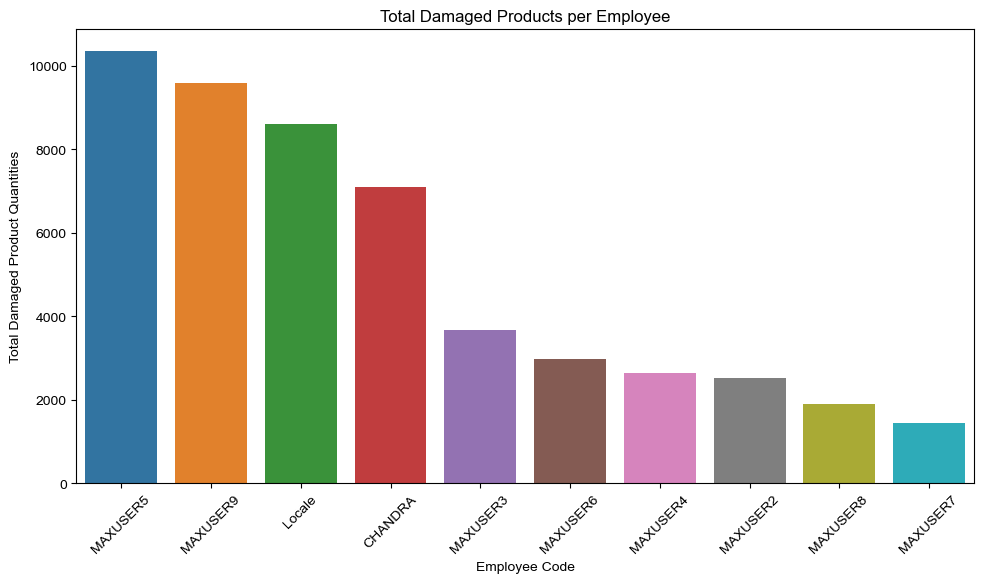

In [13]:
# Plot the employees responsible for frequent damages
plt.figure(figsize=(10, 6))
sns.barplot(x='employee_code', y='transaction_quantity', data = employee_quantity_damage)
sns.set_theme(style="ticks")
plt.title('Total Damaged Products per Employee')
plt.xlabel('Employee Code')
plt.ylabel('Total Damaged Product Quantities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Equipment most oftenly used while product damages with total quantity

In [14]:
# Identify which equipment is used most often when products quantities are damaged
equipment_quantity_damage = damaged_df.groupby('end_location_id')['transaction_quantity'].sum().reset_index().sort_values(by='transaction_quantity', ascending=False)
equipment_quantity_damage

,end_location_id,transaction_quantity
2,DS04,11862
6,DTI02,10287
4,DS06,6454
3,DS05,5314
0,DS01,4014
1,DS03,3748
13,VNA07,3065
5,DTI01,2828
12,VNA03,2822
8,GWPICK,239


#### Graphical representation of Equipment most oftenly used while product damages with total quantity

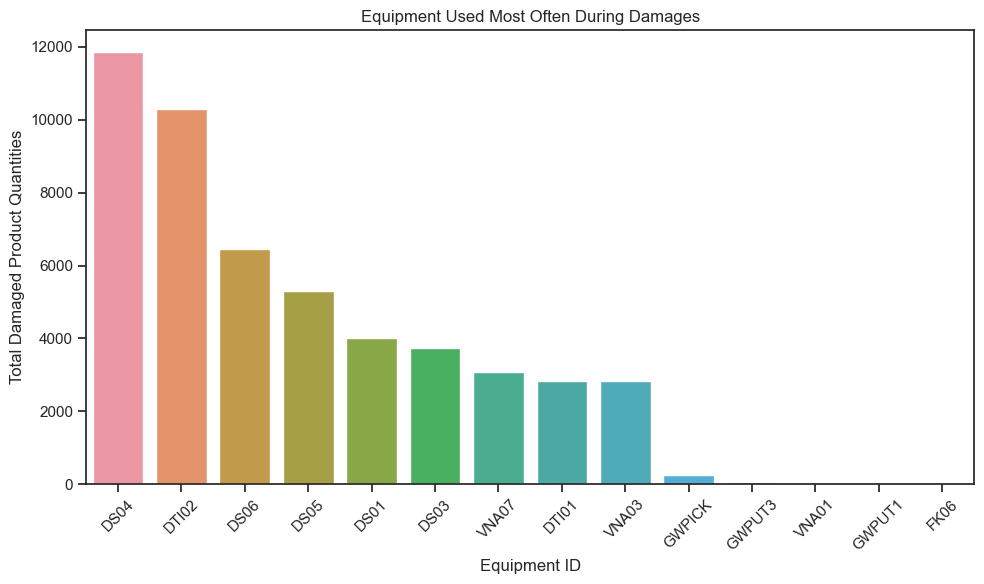

In [15]:
# Plot the equipment used most often when products are damaged
plt.figure(figsize=(10, 6))
sns.barplot(x='end_location_id', y='transaction_quantity', data=equipment_quantity_damage)
sns.set_theme(style="ticks")
plt.title('Equipment Used Most Often During Damages')
plt.xlabel('Equipment ID')
plt.ylabel('Total Damaged Product Quantities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Correlating the employee with equipment used during the product damages for total quantity

In [16]:
# Correlate employee with the equipment used during these incidents for total quantity damage
employee_equipment_damage = damaged_df.groupby(['employee_code', 'end_location_id'])['transaction_quantity'].sum().reset_index().sort_values(by='transaction_quantity', ascending=False)
employee_equipment_damage

,employee_code,end_location_id,transaction_quantity
59,MAXUSER5,DTI02,9604
91,MAXUSER9,DS04,8663
4,CHANDRA,DS06,5537
15,Locale,DS05,4725
35,MAXUSER3,DS04,2708
...,...,...,...
19,Locale,FK06,10
40,MAXUSER3,GWPUT3,10
66,MAXUSER6,DS06,9
6,CHANDRA,DTI02,3


In [20]:
print(total_quantity_damage)
print(employee_quantity_damage)
print(equipment_quantity_damage)
print(employee_equipment_damage)

    sku_number  transaction_quantity
122   50149711                  9511
78    50014523                  8963
42    50000242                  5734
28    50000057                  5049
72    50010476                  4523
..         ...                   ...
84    50035298                     0
74    50011483                     0
55    50005807                     0
54    50005575                     0
0        12345                     0

[157 rows x 2 columns]
  employee_code  transaction_quantity
5      MAXUSER5                 10350
9      MAXUSER9                  9576
1        Locale                  8595
0       CHANDRA                  7104
3      MAXUSER3                  3669
6      MAXUSER6                  2975
4      MAXUSER4                  2651
2      MAXUSER2                  2530
8      MAXUSER8                  1898
7      MAXUSER7                  1431
   end_location_id  transaction_quantity
2             DS04                 11862
6            DTI02              

#### Total count of product damages for the particular item number 

In [81]:
# Count the number of times each SKU number is involved in damage
product_damage_count = damaged_df.groupby('sku_number').size().reset_index(name='damage_count').sort_values(by='damage_count', ascending=False)

product_damage_count

,sku_number,damage_count
28,50000057,49
81,50014535,34
69,50010236,18
39,50000185,17
94,50112173,15
...,...,...
54,50005575,1
53,50002835,1
50,50001709,1
49,50001708,1


#### Count of number of times each employee involved in damage

In [82]:
# Count the number of times each employee is involved in damage
employee_damage_count = damaged_df.groupby('employee_code').size().reset_index(name='damage_count').sort_values(by='damage_count', ascending=False)
employee_damage_count

,employee_code,damage_count
0,CHANDRA,72
1,Locale,51
4,MAXUSER4,49
5,MAXUSER5,47
2,MAXUSER2,44
9,MAXUSER9,44
8,MAXUSER8,40
6,MAXUSER6,39
3,MAXUSER3,38
7,MAXUSER7,36


#### Count of number of times each equipment involved in damage

In [83]:
# Count the number of times each equipment is involved in damage
equipment_damage_count = damaged_df.groupby('end_location_id').size().reset_index(name='damage_count').sort_values(by='damage_count', ascending=False)
equipment_damage_count

,end_location_id,damage_count
6,DTI02,54
0,DS01,53
3,DS05,53
5,DTI01,53
1,DS03,51
2,DS04,51
12,VNA03,51
13,VNA07,50
4,DS06,29
8,GWPICK,5


#### Count the number of times each employee, using specific equipment, is involved in damage

In [125]:
# Count the number of times each employee, using specific equipment, is involved in damage
employee_equipment_damage_count = damaged_df.groupby(['employee_code', 'end_location_id']).size().reset_index(name='damage_count')
employee_equipment_damage_count = employee_equipment_damage_count.sort_values(by='damage_count', ascending=False)

# Display the results
employee_equipment_damage_count

,employee_code,end_location_id,damage_count
11,CHANDRA,VNA07,13
1,CHANDRA,DS03,11
48,MAXUSER4,DTI01,10
35,MAXUSER3,DS04,10
59,MAXUSER5,DTI02,10
...,...,...,...
36,MAXUSER3,DS06,1
20,Locale,GWPUT1,1
19,Locale,FK06,1
77,MAXUSER7,VNA01,1


In [85]:
# Display the results
product_damage_count, employee_damage_count, equipment_damage_count, employee_equipment_damage_count

(      sku_number  damage_count
 28      50000057            49
 81      50014535            34
 69      50010236            18
 39      50000185            17
 94      50112173            15
 ..           ...           ...
 54      50005575             1
 53      50002835             1
 50      50001709             1
 49      50001708             1
 156  testitem123             1
 
 [157 rows x 2 columns],
   employee_code  damage_count
 0       CHANDRA            72
 1        Locale            51
 4      MAXUSER4            49
 5      MAXUSER5            47
 2      MAXUSER2            44
 9      MAXUSER9            44
 8      MAXUSER8            40
 6      MAXUSER6            39
 3      MAXUSER3            38
 7      MAXUSER7            36,
    end_location_id  damage_count
 6            DTI02            54
 0             DS01            53
 3             DS05            53
 5            DTI01            53
 1             DS03            51
 2             DS04            51
 12      

#### Plotting performance plot for each employee based on the damaged products 

  employee_code  total_transactions  damage_count    Rating
0       CHANDRA                7104            72  1.013514
1        Locale                8595            51  0.593368
2      MAXUSER2                2530            44  1.739130
3      MAXUSER3                3669            38  1.035705
4      MAXUSER4                2651            49  1.848359
5      MAXUSER5               10350            47  0.454106
6      MAXUSER6                2975            39  1.310924
7      MAXUSER7                1431            36  2.515723
8      MAXUSER8                1898            40  2.107482
9      MAXUSER9                9576            44  0.459482


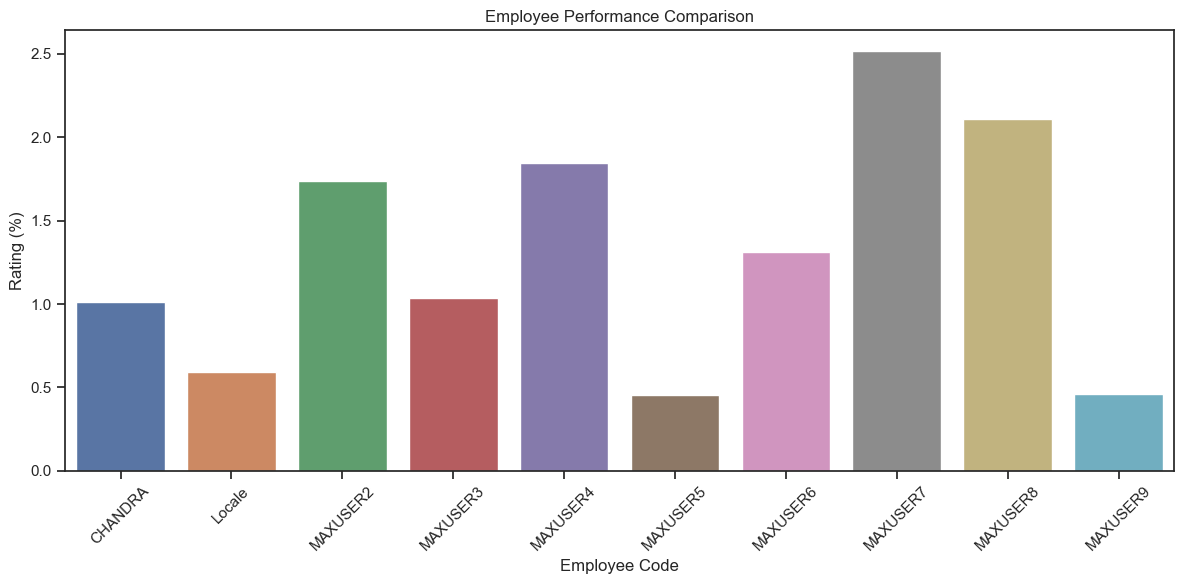

In [146]:
# Assuming the dataset has a 'total_transactions' column representing total transactions handled by each employee
employee_performance = df.groupby('employee_code').agg(
    total_transactions = ('transaction_quantity', 'sum'),
    damage_count = ('transaction_quantity', lambda x: (df.loc[x.index, 'reason_id'] == 3).sum())
).reset_index()

# Calculate the damage rate per employee
employee_performance['Rating'] = (employee_performance['damage_count'] / employee_performance['total_transactions']*100)
print(employee_performance)

# Plot employee performance
plt.figure(figsize=(12, 6))
sns.barplot(data=employee_performance, x='employee_code', y='Rating')
sns.set_theme(style="ticks",  palette="pastel")
plt.xlabel('Employee Code')
plt.ylabel('Rating (%)')
plt.title('Employee Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### plotting Graph for Total quantity of all products damaged in each warehouse.

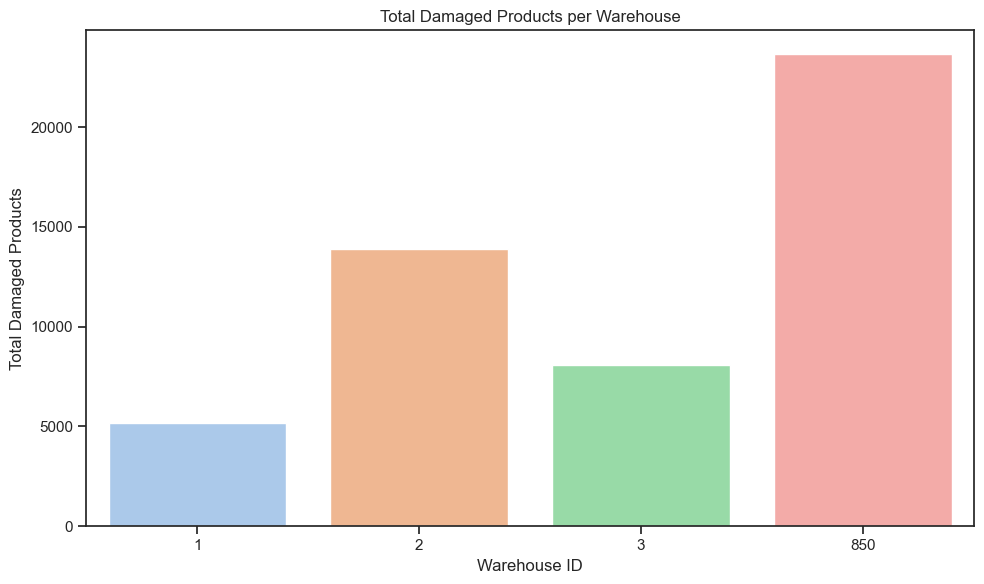

In [148]:
# Total damaged products per warehouse
warehouse_summary = df.groupby('warehouse_id')['transaction_quantity'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='warehouse_id', y='transaction_quantity', data=warehouse_summary)
sns.set_theme(style="ticks",  palette="pastel")
plt.title('Total Damaged Products per Warehouse')
plt.xlabel('Warehouse ID')
plt.ylabel('Total Damaged Products')
plt.tight_layout()
plt.show()